#Flight Fare Prediction Using Machine Learning

In this article, we will be analyzing the flight fare dataset using essential exploratory data analysis techniques then will draw some predictions about the price of the flight based on some features such as what type of airline it is, what is the arrival time, what is the departure time, what is the duration of the flight, source, destination and more.

**About the Dataset**
1. Airline: So this column will have all the types of airlines like Indigo, Jet Airways, Air India, and many more.
2. Date_of_Journey: This column will let us know about the date on which the passenger's journey will start.
3. Source: This column holds the name of the place from where the passenger's journey will start.
4. Destination: This column holds the name of the place to where passengers wanted to travel.
5. Route: Here we can know about that what is the route through which passengers have opted to travel from his/her source to their destination.
6. Arrival_Time: Arrival time is when the passenger will reach his/her destination.
7. Duration: Duration is the whole time period that a flight will take to complete its journey from source to destination.
8. Total_Stops: This will let us know in how many places flights will stop there for the flight in the whole journey.
9. Additional_Info: In this column, we will get information about food, kind of food, and other amenities.
10. Price: Price of the flight for a complete journey including all the expenses before onboarding.

**Importing Libraries**

In [364]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from prettytable import PrettyTable
%matplotlib inline

**Reading the Training Data of our Dataset**

In [262]:
train=pd.read_excel('/content/Data_Train.xlsx')

In [263]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


**Exploratory Data Analysis(EDA) and Data Visualization**

In [264]:
#It will let us know how many features do this Dataset have
train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [265]:
#It will tell us more about Dataset that how my Features values are spreaded, their mean value, min and max value
train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


Observation:

1. Average Price of the ticket is 9087.06
2. It is having the S.D of 4611.359
3. 75% of prices are between 12373

In [266]:
#Here we can get more information about Dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [267]:
#It will tell us how many Null values do we have in the Dataset
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

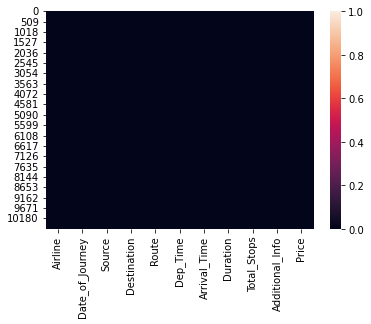

In [268]:
#By using the Heatmap,It becomes easy that in which data point do we have Null Values
sns.heatmap(train.isnull())

Observation:

1. It has only two null values i.e one is from route column and second one is from Total_Stops
2. The Null values are very less that's why The Heatmap didn't performed well.

In [269]:
#It tells us how many rows and columns does the Dataset has
train.shape

(10683, 11)

In [270]:
#Extracting the Information from Additional_Info feature in our Dataset
train.Additional_Info.value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

Observation:

Most of the passengers don't have additional info

In [271]:
#It tells us how many Airlines are there in this Dataset
train.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [272]:
#It shows that the count of the Different Airlines in the Dataset
train.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [273]:
#By using the groupby() and mean,I'm checking the average Price of each Airline
train.groupby('Airline').Price.mean().sort_values(ascending=True)

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9611.210616
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

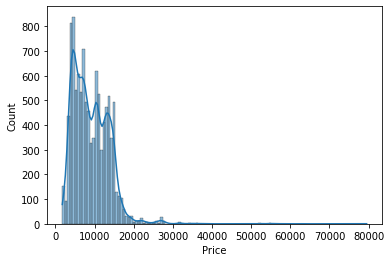

In [274]:
#This histogram helps to visualize the Price 
sns.histplot(train.Price,kde=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

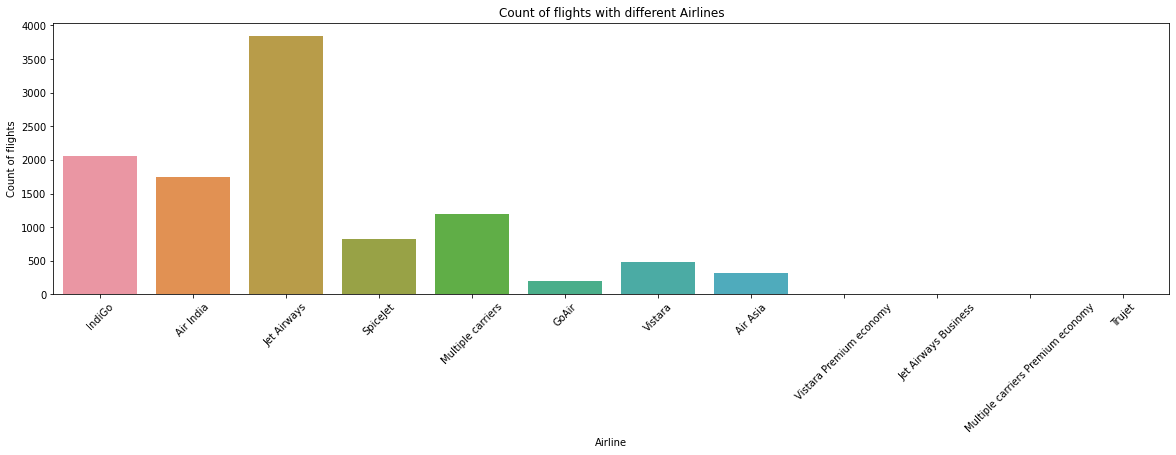

In [275]:
#Visualizing the Count of Airlines vs Number of Flights
plt.figure(figsize = (20,5))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =train)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 45)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


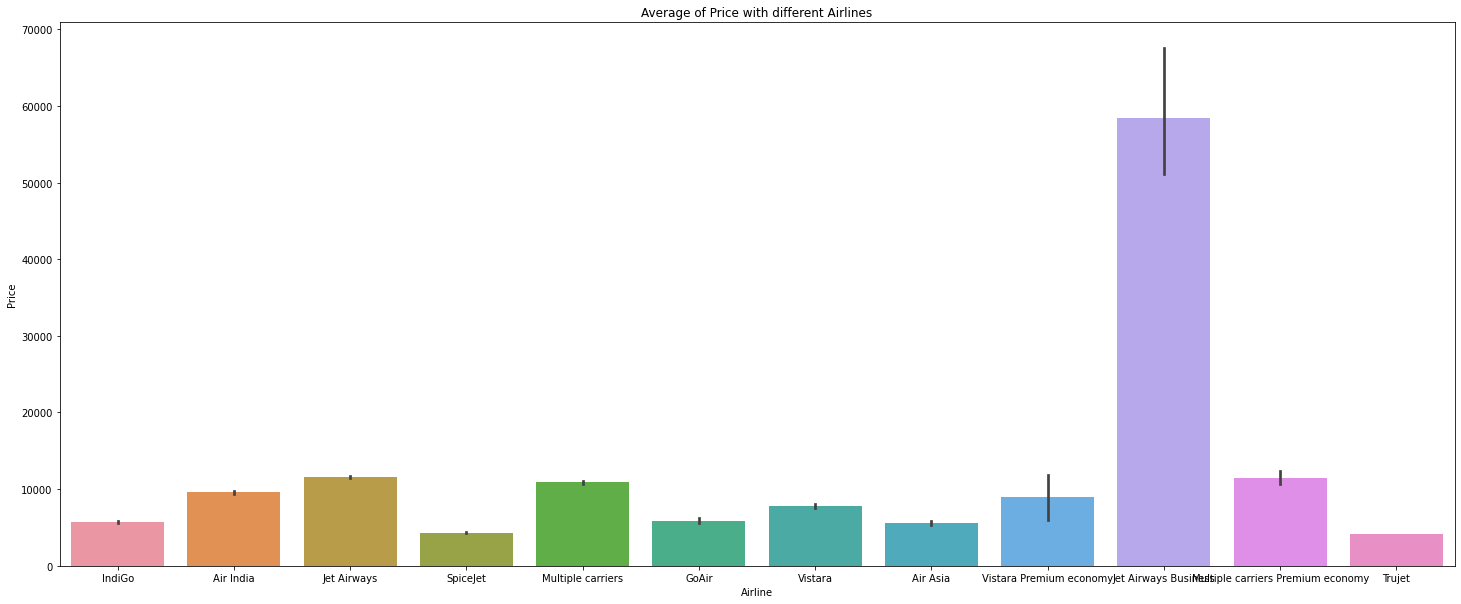

In [276]:
#Visualizing the Average Price for each Airline by using barplot()
fig,ax=plt.subplots(figsize=(25,10))
plt.title('Average of Price with different Airlines')
sns.barplot('Airline','Price',data=train,ax=ax)

Observation:

Jet Airways Business has very costly ticket.

Average of this ticket is around 58358.12

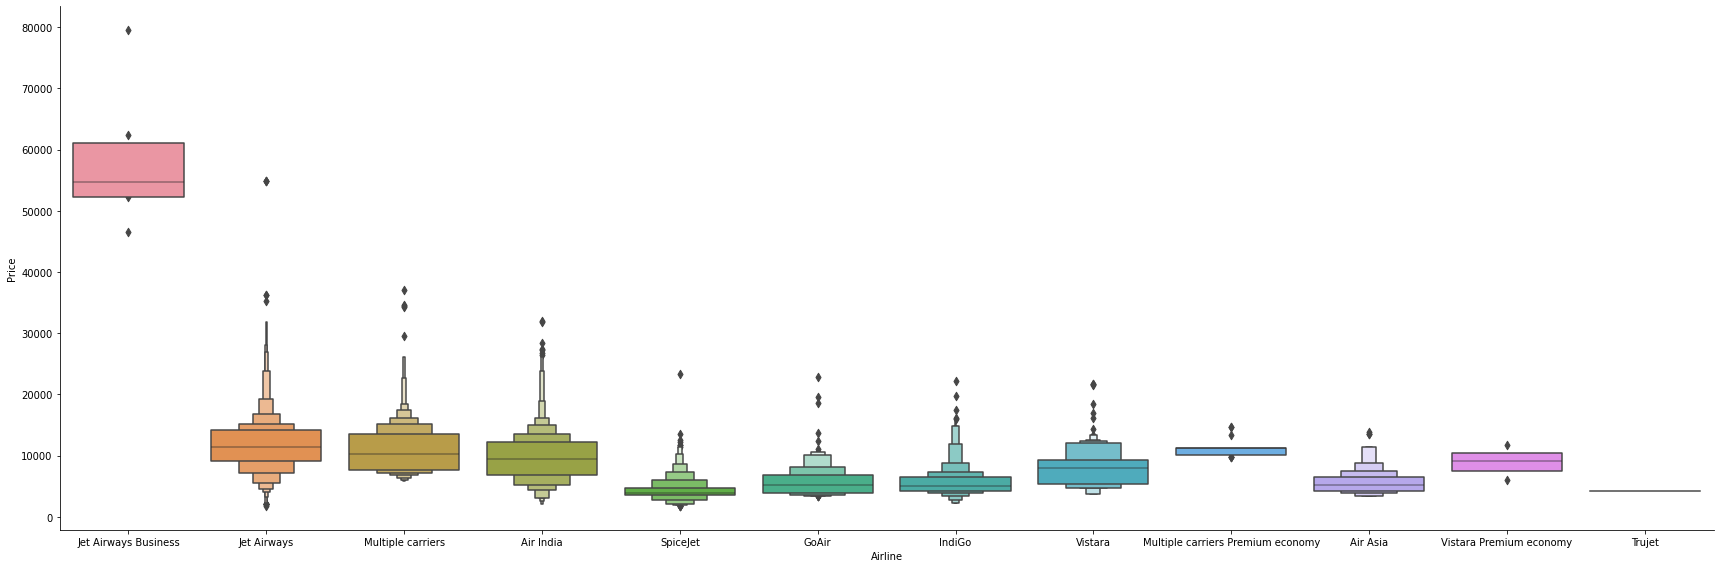

In [277]:
# Plotting Price vs Airline plot
sns.catplot(y = "Price", x = "Airline", data = train.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()

Observation: Here with the help of catplot we are trying to plot the boxplot between the price of the flight and airline and we can draw the conclusion that Jet airways has the most outliers in terms of price.

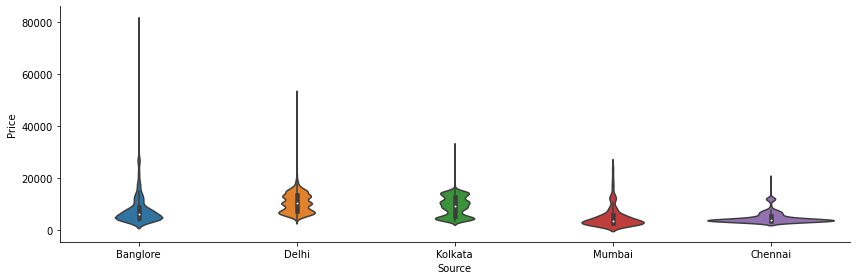

In [278]:
# Plotting Violin plot for Price vs Source
sns.catplot(y = "Price", x = "Source", data = train.sort_values("Price", ascending = False), kind="violin", height = 4, aspect = 3)
plt.show()

Observation:
Now with the help of catplot only we are plotting a box plot between the price of the flight and the source place i.e. the place from where passengers will travel to the destination and we can see that Banglore as the source location has the most outliers while Chennai has the least.

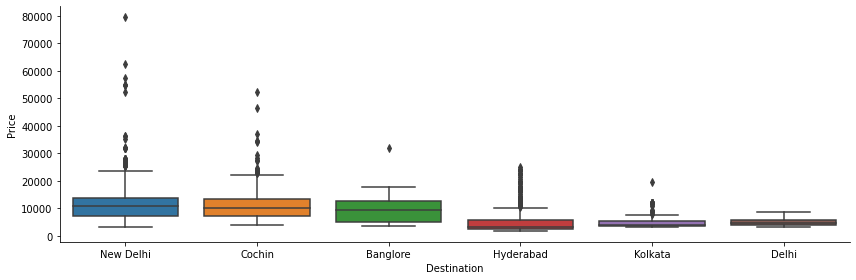

In [279]:
# Plotting Box plot for Price vs Destination
sns.catplot(y = "Price", x = "Destination", data = train.sort_values("Price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

Observation: Here we are plotting the box plot with the help of catplot between price of the flight and destination to which passenger is travelling to and figured out that New delhi has the most outliers and Kolkata has the least

**Now,Looking at our Test Dataset**

In [280]:
test=pd.read_excel('/content/Test_set.xlsx')

In [281]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [282]:
test.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [283]:
test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

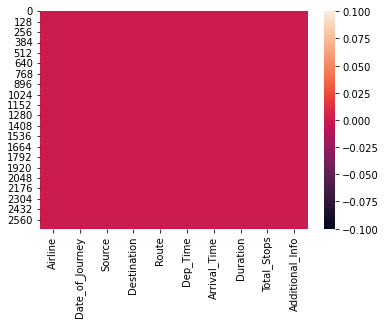

In [284]:
sns.heatmap(test.isnull())

In [285]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [286]:
#Checking the Row based on the column Route contains the Null value
train[train.Route.isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


This is the row that contains null values in Route and Total_Stops Feature

**The Source and Destination names**

In [287]:
#It tells us the names of the Source means where the Flight take off
train.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [288]:
#These are the different names of the places where the flight lands
train.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

**Feature Engineering**

Converting Date_of_Journey object into parts 

In [289]:
#For Train Data
train[['Day','Month','Year']]=train.Date_of_Journey.str.split('/',expand=True)
#For Test Data
test[['Day','Month','Year']]=test.Date_of_Journey.str.split('/',expand=True)

In [290]:
train.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019


In [291]:
test.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day,Month,Year
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,06,2019
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,05,2019


Dropping the Date_of_Journey Column

In [292]:
#As I already extracted the valuable information from Date_of_Journey column,now it is of no use
#I am dropping this Feature using drop()
train.drop('Date_of_Journey',axis=1,inplace=True)

In [293]:
#For Test Data
test.drop('Date_of_Journey',axis=1,inplace=True)

In [294]:
#As We can see the Day,Month and Year still contains Object values and we need to convert it into Numerical Form
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Day              10683 non-null  object
 11  Month            10683 non-null  object
 12  Year             10683 non-null  object
dtypes: int64(1), object(12)
memory usage: 1.1+ MB


Converting the Day,Month and year column type from object to int

In [295]:
#For Train Data
train['Day']=train.Day.astype(int)
train['Month']=train.Month.astype(int)
train['Year']=train.Year.astype(int)

In [296]:
#For Test Data
test['Day']=test.Day.astype(int)
test['Month']=test.Month.astype(int)
test['Year']=test.Year.astype(int)

Spliting Duration into different columns

In [297]:
#Dur_Hour and Dur_Min Splitting from Duration
#For Train Data
train[['Dur_Hour','Dur_Min']]=train.Duration.str.split(' ',expand=True)

In [298]:
#For Test Data
test[['Dur_Hour','Dur_Min']]=test.Duration.str.split(' ',expand=True)

In [299]:
train.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dur_Hour,Dur_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,2h,50m
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,7h,25m
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,19h,None


In [300]:
#Dropping the Duration column as it gave all valuable information
train.drop('Duration',axis=1,inplace=True)

In [301]:
test.drop('Duration',axis=1,inplace=True)

Converting Source and Destination into numerical form

In [302]:
train.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [303]:
#Mapping the different names of Sources to one unique Numerical Number
train['Source']=train.Source.map({'Banglore':0,'Kolkata':1,'Delhi':2,'Chennai':3,'Mumbai':4})

In [304]:
#For Test Data
test['Source']=test.Source.map({'Banglore':0,'Kolkata':1,'Delhi':2,'Chennai':3,'Mumbai':4})

In [305]:
#All Destination names 
train.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [306]:
#Mapping the Destination names with unique numerical Number
train['Destination']=train.Destination.map({'Banglore':0,'Kolkata':1,'Delhi':2,'New Delhi':4,'Cochin':5,'Hyderabad':6})

In [307]:
test['Destination']=test.Destination.map({'Banglore':0,'Kolkata':1,'Delhi':2,'New Delhi':4,'Cochin':5,'Hyderabad':6})

Source unique mapped numbers
1. Banglore : 0
2. Kolkata : 1
3. Delhi : 2
4. Chennai : 3
5. Mumbai : 4

Destination unique mapped Numbers

1. Banglore : 0
2. Kolkata : 1
3. Delhi : 2
4. New Delhi : 3
5. Cochin : 4
6. Hyderabad : 5

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


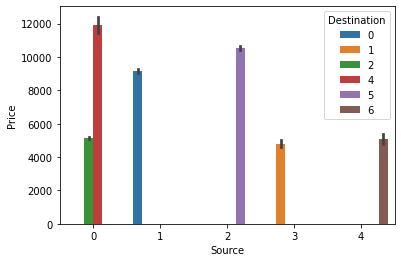

In [308]:
sns.barplot('Source','Price',hue='Destination',data=train)

Observation:
The Flight take off from Source 0(Banglore) to Destination 2 & 4(Delhi and Cochin) where The average price to Delhi is lesser than to Cochin.

The Flight from Source 0 goes to 2 destinations and rest of all goes to only one Destination.

In [309]:
train.groupby(['Source','Destination']).Price.mean()

Source  Destination
0       2               5143.918577
        4              11917.716738
1       0               9158.389411
2       5              10539.439057
3       1               4789.892388
4       6               5059.708752
Name: Price, dtype: float64

In [310]:
train.Destination.corr(train.Price)

0.1361096640410466

Observation:
The Destination Feature has Positive correlation with Price

Arrival Time splitting

In [311]:
train['Arrival_Time']=train.Arrival_Time.apply(lambda x:x.split(' ')[0])

In [312]:
test['Arrival_Time']=test.Arrival_Time.apply(lambda x:x.split(' ')[0])

In [313]:
train.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Day,Month,Year,Dur_Hour,Dur_Min
0,IndiGo,0,4,BLR → DEL,22:20,01:10,non-stop,No info,3897,24,3,2019,2h,50m
1,Air India,1,0,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,7662,1,5,2019,7h,25m


Arrival_Time and Dep_Time splitting

In [314]:
train[['Arrival_hr','Arrival_min']]=train.Arrival_Time.str.split(':',expand=True)

In [315]:
test[['Arrival_hr','Arrival_min']]=test.Arrival_Time.str.split(':',expand=True)

In [316]:
#Dropping the Arrival_Time Feature
train.drop('Arrival_Time',axis=1,inplace=True)

In [317]:
test.drop('Arrival_Time',axis=1,inplace=True)

In [318]:
#Converting the Onject value to int of Arrival_hr and Arrival_min feature
train['Arrival_hr']=train.Arrival_hr.astype(int)
train['Arrival_min']=train.Arrival_hr.astype(int)


In [319]:
test['Arrival_hr']=test.Arrival_hr.astype(int)
test['Arrival_min']=test.Arrival_hr.astype(int)


In [320]:
train.head(2)

,Airline,Source,Destination,Route,Dep_Time,Total_Stops,Additional_Info,Price,Day,Month,Year,Dur_Hour,Dur_Min,Arrival_hr,Arrival_min
0,IndiGo,0,4,BLR → DEL,22:20,non-stop,No info,3897,24,3,2019,2h,50m,1,1
1,Air India,1,0,CCU → IXR → BBI → BLR,05:50,2 stops,No info,7662,1,5,2019,7h,25m,13,13


In [321]:
#Splitting Dep_Time into Dep_hr and Dep_hr and Dep_min
train['Dep_hr']=train['Dep_Time'].apply(lambda x:x.split(':')[0]).astype(int)
train['Dep_min']=train['Dep_Time'].apply(lambda x:x.split(':')[1]).astype(int)

In [322]:
test['Dep_hr']=test['Dep_Time'].apply(lambda x:x.split(':')[0]).astype(int)
test['Dep_min']=test['Dep_Time'].apply(lambda x:x.split(':')[1]).astype(int)

In [323]:
#Dropping the Dep_Time
train.drop('Dep_Time',axis=1,inplace=True)

In [324]:
test.drop('Dep_Time',axis=1,inplace=True)

In [325]:
train.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day,Month,Year,Dur_Hour,Dur_Min,Arrival_hr,Arrival_min,Dep_hr,Dep_min
0,IndiGo,0,4,BLR → DEL,non-stop,No info,3897,24,3,2019,2h,50m,1,1,22,20
1,Air India,1,0,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,7h,25m,13,13,5,50


In [326]:
#Checking for the rows whose Duration was in minutes and after Feature engineering,Dur_Hour contains that min value
train[train.Dur_Hour.str.contains('m')]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day,Month,Year,Dur_Hour,Dur_Min,Arrival_hr,Arrival_min,Dep_hr,Dep_min
6474,Air India,4,6,BOM → GOI → PNQ → HYD,2 stops,No info,17327,6,3,2019,5m,None,16,16,16,50


In [327]:
#For Test Data
train[train.Dur_Hour.str.contains('m')]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day,Month,Year,Dur_Hour,Dur_Min,Arrival_hr,Arrival_min,Dep_hr,Dep_min
6474,Air India,4,6,BOM → GOI → PNQ → HYD,2 stops,No info,17327,6,3,2019,5m,None,16,16,16,50


In [328]:
train.loc[train.Dur_Hour.str.contains('m'),'Dur_Hour']='0h'

In [329]:
test.loc[test.Dur_Hour.str.contains('m'),'Dur_Hour']='0h'

In [330]:
train['Dur_Hour']=train.Dur_Hour.apply(lambda x:x.split('h')[0]).astype(int)

In [331]:
test['Dur_Hour']=test.Dur_Hour.apply(lambda x:x.split('h')[0]).astype(int)

In [332]:
train.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day,Month,Year,Dur_Hour,Dur_Min,Arrival_hr,Arrival_min,Dep_hr,Dep_min
0,IndiGo,0,4,BLR → DEL,non-stop,No info,3897,24,3,2019,2,50m,1,1,22,20
1,Air India,1,0,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,7,25m,13,13,5,50


In [333]:
#For Train Data
train.loc[train.Dur_Min.isnull(),'Dur_Min']='0m'

In [334]:
#For Test Data
test.loc[test.Dur_Min.isnull(),'Dur_Min']='0m'

In [335]:
train['Dur_Min']=train.Dur_Min.apply(lambda x:x.split('m')[0]).astype(int)

In [336]:
test['Dur_Min']=test.Dur_Min.apply(lambda x:x.split('m')[0]).astype(int)

In [337]:
train.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day,Month,Year,Dur_Hour,Dur_Min,Arrival_hr,Arrival_min,Dep_hr,Dep_min
0,IndiGo,0,4,BLR → DEL,non-stop,No info,3897,24,3,2019,2,50,1,1,22,20
1,Air India,1,0,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,7,25,13,13,5,50


In [338]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  int64 
 2   Destination      10683 non-null  int64 
 3   Route            10682 non-null  object
 4   Total_Stops      10682 non-null  object
 5   Additional_Info  10683 non-null  object
 6   Price            10683 non-null  int64 
 7   Day              10683 non-null  int64 
 8   Month            10683 non-null  int64 
 9   Year             10683 non-null  int64 
 10  Dur_Hour         10683 non-null  int64 
 11  Dur_Min          10683 non-null  int64 
 12  Arrival_hr       10683 non-null  int64 
 13  Arrival_min      10683 non-null  int64 
 14  Dep_hr           10683 non-null  int64 
 15  Dep_min          10683 non-null  int64 
dtypes: int64(12), object(4)
memory usage: 1.3+ MB


Dropping the Additional_Info and Route feature

In [339]:
train.drop('Additional_Info',axis=1,inplace=True)

In [340]:
train.drop('Route',axis=1,inplace=True)

In [341]:
train.drop('Year',axis=1,inplace=True)

In [342]:
test.drop('Additional_Info',axis=1,inplace=True)
test.drop('Route',axis=1,inplace=True)
test.drop('Year',axis=1,inplace=True)

In [343]:
train.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [344]:
#Mapping the value to Total_Stops
train['Total_Stops']=train.Total_Stops.map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

In [345]:
test['Total_Stops']=test.Total_Stops.map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

In [346]:
train[train.Total_Stops.isnull()]

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Dur_Hour,Dur_Min,Arrival_hr,Arrival_min,Dep_hr,Dep_min
9039,Air India,2,5,NaN,7480,6,5,23,40,9,9,9,45


In [347]:
train.groupby(['Source','Destination','Total_Stops']).Price.mean()

Source  Destination  Total_Stops
0       2            0.0             5143.918577
        4            0.0             7399.975610
                     1.0            14016.540925
                     2.0            13322.800000
                     3.0            12761.000000
                     4.0            17686.000000
1       0            0.0             4556.055249
                     1.0            10477.414395
                     2.0            12036.125828
                     3.0            13151.272727
2       5            0.0             6315.816901
                     1.0            10030.822606
                     2.0            12752.039533
                     3.0            12939.840000
3       1            0.0             4789.892388
4       6            0.0             3932.809984
                     1.0            12520.477273
                     2.0            16696.266667
                     3.0            16276.500000
Name: Price, dtype: float64

In [348]:
train.Total_Stops.fillna(value=0,inplace=True)

In [349]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Airline      10683 non-null  object 
 1   Source       10683 non-null  int64  
 2   Destination  10683 non-null  int64  
 3   Total_Stops  10683 non-null  float64
 4   Price        10683 non-null  int64  
 5   Day          10683 non-null  int64  
 6   Month        10683 non-null  int64  
 7   Dur_Hour     10683 non-null  int64  
 8   Dur_Min      10683 non-null  int64  
 9   Arrival_hr   10683 non-null  int64  
 10  Arrival_min  10683 non-null  int64  
 11  Dep_hr       10683 non-null  int64  
 12  Dep_min      10683 non-null  int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 1.1+ MB


In [350]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [351]:
train['Airline']=labelencoder.fit_transform(train['Airline'])

In [352]:
test['Airline']=labelencoder.fit_transform(test['Airline'])

In [353]:
train.head(5)

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Dur_Hour,Dur_Min,Arrival_hr,Arrival_min,Dep_hr,Dep_min
0,3,0,4,0.0,3897,24,3,2,50,1,1,22,20
1,1,1,0,2.0,7662,1,5,7,25,13,13,5,50
2,4,2,5,2.0,13882,9,6,19,0,4,4,9,25
3,3,1,0,1.0,6218,12,5,5,25,23,23,18,5
4,3,0,4,1.0,13302,1,3,4,45,21,21,16,50


**Checking the Correlation between all Features**

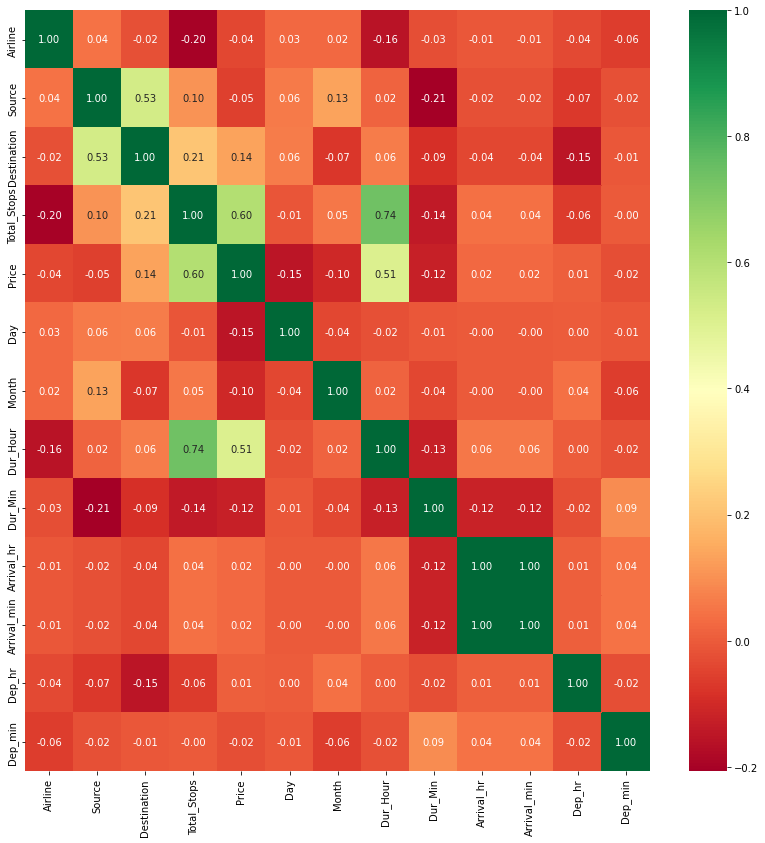

In [354]:
plt.figure(figsize=(14,14))
sns.heatmap(train.corr(),annot=True,fmt='.2f',cmap = "RdYlGn")

**Splitting the Dataset**

In [355]:
X=train.drop('Price',axis=1)
y=train.Price

In [356]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [357]:
print("The size of training input is", X_train.shape)
print("The size of training output is", y_train.shape)
print("The size of testing input is", X_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (7478, 12)
The size of training output is (7478,)
The size of testing input is (3205, 12)
The size of testing output is (3205,)


#Model Building

**Linear Regression**

In [375]:
lin_model=LinearRegression()
lin_model.fit(X_train,y_train)
x_train_predict=lin_model.predict(X_train)
x_test_predict=lin_model.predict(X_test)

In [377]:
print("Train Results for Linear Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_train.values, x_train_predict)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_train.values, x_train_predict)))
print("R-Squared: ", r2_score(y_train.values, x_train_predict))

Train Results for Linear Regressor Model:
Root Mean Squared Error:  3500.083373231175
Mean Absolute % Error:  0
R-Squared:  0.43584238223439464


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


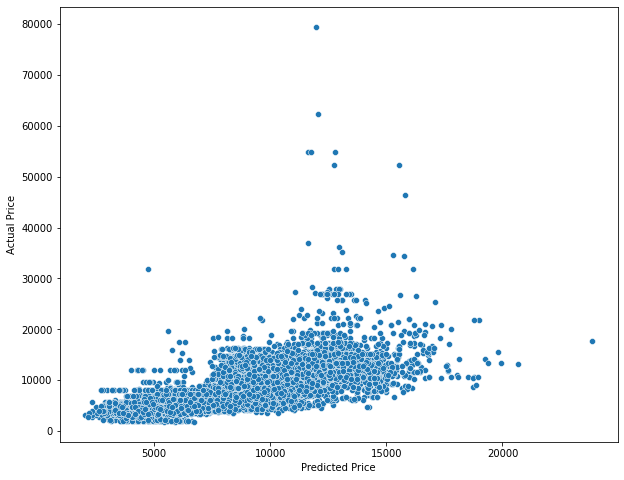

In [379]:
plt.figure(figsize=(10,8))
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
sns.scatterplot(x_train_predict,y_train.values)

In [362]:
# Predicting train and test results
y_train_pred = lin_regressor.predict(X_train)
y_test_pred = lin_regressor.predict(X_test)

In [365]:
print("Train Results for Linear Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-Squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Linear Regressor Model:
Root Mean Squared Error:  3500.083373231175
Mean Absolute % Error:  0
R-Squared:  0.43584238223439464


In [366]:
print("Test Results for Linear Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-Squared: ", r2_score(y_test, y_test_pred))

Test Results for Linear Regressor Model:
Root Mean Squared Error:  3304.7595744913974
Mean Absolute % Error:  0
R-Squared:  0.4592927835849874


**Ridge Regression**

In [367]:
# Performing GridSearchCV on Ridge Regression
params = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_regressor = GridSearchCV(Ridge(), params, cv = 5, scoring = 'neg_mean_absolute_error', n_jobs = -1)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [368]:
# Predicting train and test results
y_train_pred = ridge_regressor.predict(X_train)
y_test_pred = ridge_regressor.predict(X_test)

In [369]:
print("Train Results for Ridge Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-Squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Ridge Regressor Model:
Root Mean Squared Error:  3500.0835529892056
Mean Absolute % Error:  0
R-Squared:  0.4358423242861379


In [370]:
print("Test Results for Ridge Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-Squared: ", r2_score(y_test, y_test_pred))

Test Results for Ridge Regressor Model:
Root Mean Squared Error:  3304.7501457723474
Mean Absolute % Error:  0
R-Squared:  0.4592958689344926


**Lasso Regression**

In [371]:
# Performing GridSearchCV on Lasso Regression
params = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
lasso_regressor = GridSearchCV(Lasso(), params ,cv = 15,scoring = 'neg_mean_absolute_error', n_jobs = -1)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=15, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [372]:
# Predicting train and test results
y_train_pred = lasso_regressor.predict(X_train)
y_test_pred = lasso_regressor.predict(X_test)

In [373]:
print("Train Results for Lasso Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-Squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Lasso Regressor Model:
Root Mean Squared Error:  3511.0860566743795
Mean Absolute % Error:  0
R-Squared:  0.43228989310148636


In [374]:
print("Test Results for Lasso Regressor Model:")
print("Root Mean squared Error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-Squared: ", r2_score(y_test, y_test_pred))

Test Results for Lasso Regressor Model:
Root Mean squared Error:  3317.2291612971817
Mean Absolute % Error:  0
R-Squared:  0.45520467024895317


**Decision Tree Algorithm**

In [380]:
# Performing GridSearchCV on Decision Tree Regression
depth = list(range(3,30))
param_grid = dict(max_depth = depth)
tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 10)
tree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [390]:
# Predicting train and test results
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [388]:
print("Train Results for Decision Tree Regressor Model:")
print("Root Mean squared Error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-Squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Decision Tree Regressor Model:
Root Mean squared Error:  1209.5873436820104
Mean Absolute % Error:  0
R-Squared:  0.9326219953175996


In [386]:
print("Test Results for Decision Tree Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-Squared: ", r2_score(y_test, y_test_pred))

Test Results for Decision Tree Regressor Model:
Root Mean Squared Error:  2339.802558856423
Mean Absolute % Error:  0
R-Squared:  0.7289553433727226


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


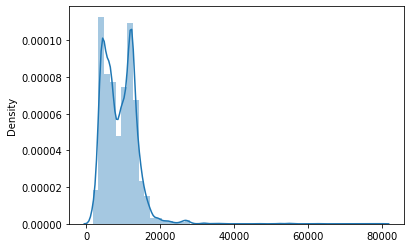

In [391]:
sns.distplot(y_train_pred)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


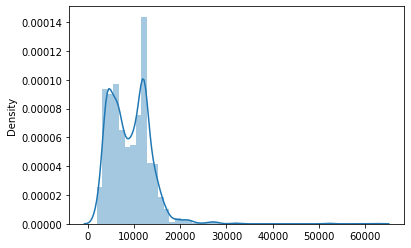

In [392]:
sns.distplot(y_test_pred)

**Error Y_train v/s Y_train_pred**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Error')

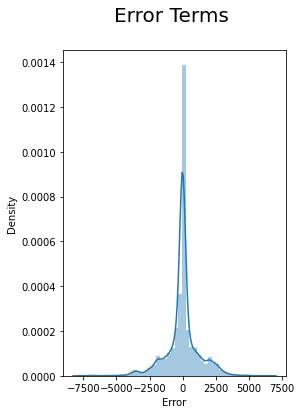

In [396]:
plt.figure(figsize=(4,6))
sns.distplot(y_train.values - y_train_pred)
plt.suptitle('Error Terms',fontsize=20)
plt.xlabel('Error')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Error')

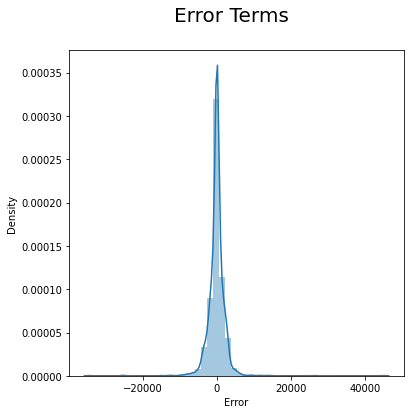

In [398]:
plt.figure(figsize=(6,6))
sns.distplot(y_test.values - y_test_pred)
plt.suptitle('Error Terms',fontsize=20)
plt.xlabel('Error')

In [384]:
ridge_score = round(ridge_regressor.score(X_train, y_train) * 100, 2)
ridge_score_test = round(ridge_regressor.score(X_test, y_test) * 100, 2)

lasso_score = round(lasso_regressor.score(X_train, y_train) * 100, 2)
lasso_score_test = round(lasso_regressor.score(X_test, y_test) * 100, 2)

decision_score = round(tree.score(X_train, y_train) * 100, 2)
decision_score_test = round(tree.score(X_test, y_test) * 100, 2)

**Comparing All Models**

In [399]:
# Comparing all the models
models = pd.DataFrame({
    'Model': [ 'Ridge Regression', 'Lasso Regression','Decision Tree Regressor'],
    'Score': [ ridge_score, lasso_score, decision_score],
    'Test Score': [ ridge_score_test, lasso_score_test, decision_score_test]})
models.sort_values(by='Test Score', ascending=False)

,Model,Score,Test Score
2,Decision Tree Regressor,93.26,72.90
0,Ridge Regression,-243878.70,-238996.24
1,Lasso Regression,-243760.02,-239092.36


In [400]:
# Training = Tr.
# Testing = Te.
x = PrettyTable()
x.field_names = ["Model Name", "Tr. RMSE", "Tr. MA%E", "Tr. R-Squared", "Te. RMSE", "Te. MA%E", "Te. R-Squared",]
x.add_row(['Ridge Regression','3558.67','32','0.42','3457.60','32','0.42'])
x.add_row(['Lasso Regression','3560.85','32','0.41','3459.38','32','0.42'])
x.add_row(['Decision Tree Regressor','853.54','06','0.97','1857.68','10','0.83'])
print(x)

+-------------------------+----------+----------+---------------+----------+----------+---------------+
|        Model Name       | Tr. RMSE | Tr. MA%E | Tr. R-Squared | Te. RMSE | Te. MA%E | Te. R-Squared |
+-------------------------+----------+----------+---------------+----------+----------+---------------+
|     Ridge Regression    | 3558.67  |    32    |      0.42     | 3457.60  |    32    |      0.42     |
|     Lasso Regression    | 3560.85  |    32    |      0.41     | 3459.38  |    32    |      0.42     |
| Decision Tree Regressor |  853.54  |    06    |      0.97     | 1857.68  |    10    |      0.83     |
+-------------------------+----------+----------+---------------+----------+----------+---------------+


**Conclusion**

By Comparing all the models,we can conclude that Decision Tree Regressor performs the best